# Machine Learning Predicting Survival on the Titanic


# Predict survival on the Titanic

    Defining the problem statement
 
    Collecting the data
    
    Exploratory data analysis
    
    Feature engineering
    
    Modelling
    
    Testing

# 1. Defining the problem statement

In [ ]:
 
 I apply the tools of machine learning to predict which passengers survived the Titanic tragedy.

# Load the libraries

In [245]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation and mathematics operator
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv
from catboost import CatBoostRegressor, Pool, cv

#Data scaling
from sklearn.preprocessing import StandardScaler

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')


# Load the test and trian data

In [246]:
# Import train & test data 
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
gender_submission = pd.read_csv('data/gender_submission.csv') # example of what a submission should look like

In [247]:
# View top head row of all the dataset
display(train.head(), test.head(),gender_submission.head())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Data Descriptions

Survival: 0 = No, 1 = Yes
    
pclass (Ticket class): 1 = 1st, 2 = 2nd, 3 = 3rd
    
sex: Sex
    
Age: Age in years
    
sibsp: number of siblings/spouses aboard the Titanic
    
parch: number of parents/children aboard the Titanic
    
ticket: Ticket number
    
fare: Passenger fare
    
cabin: Cabin number
    
embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [248]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Missing values can be checked and visualised

In [249]:
train.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


# Check for  missing values 

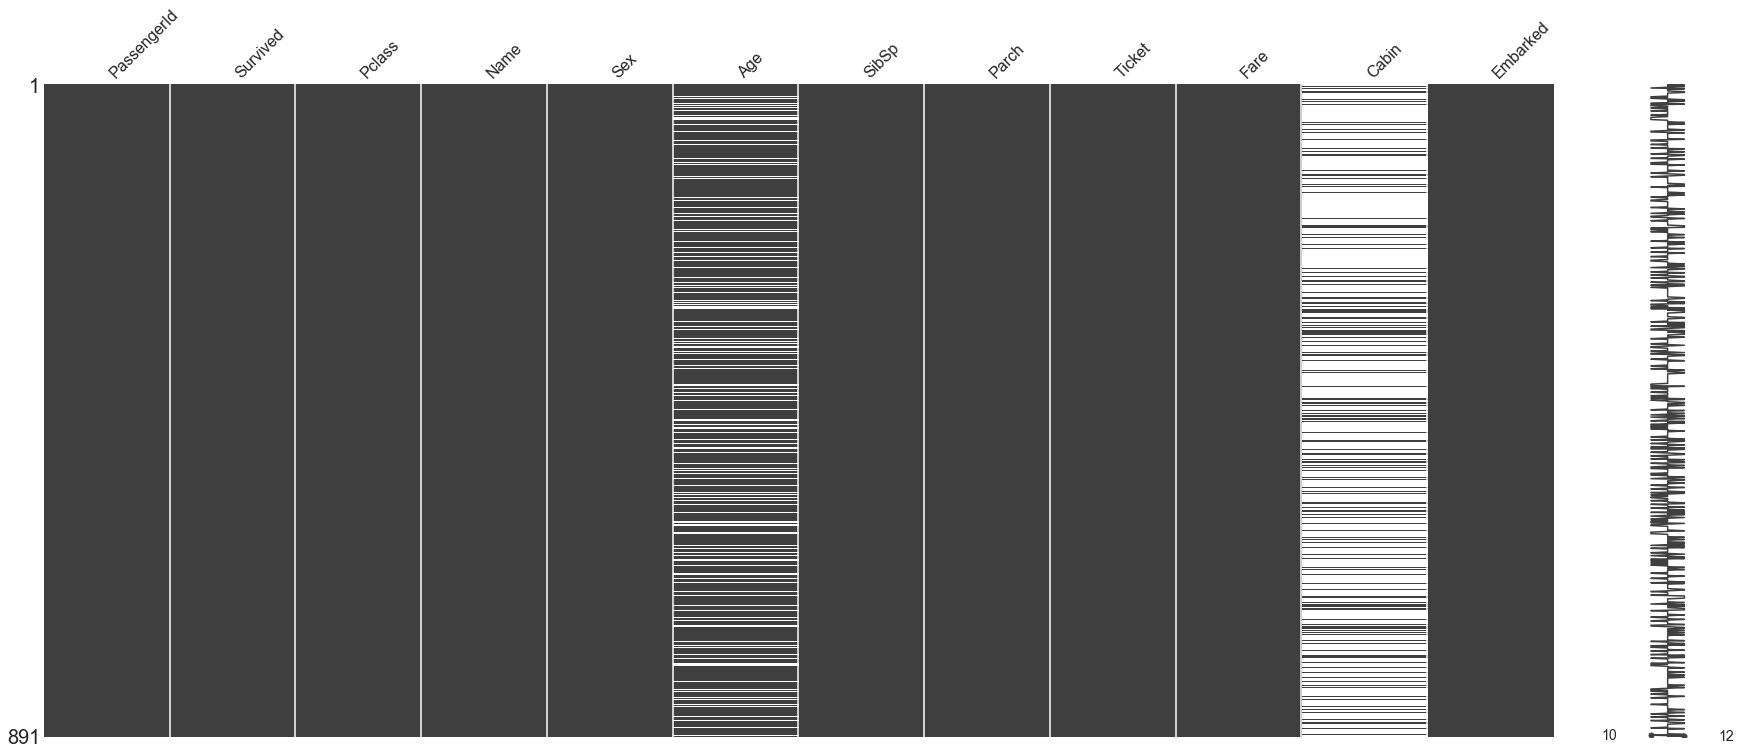

In [250]:
# graphically determine the  missing values by missingno
missingno.matrix(train, figsize = (30,12))

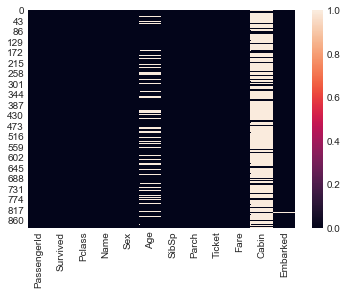

In [251]:
# graphically determine the  missing values by seaborn
sns.heatmap(train.isnull())

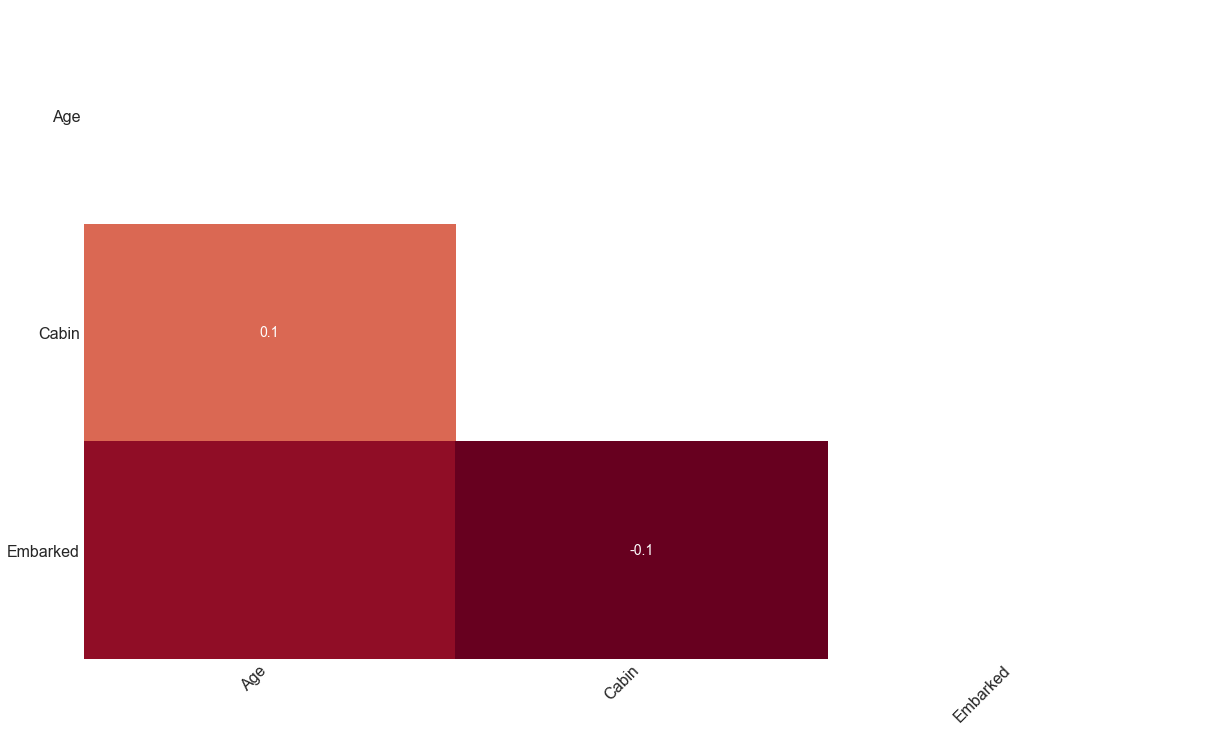

In [252]:
# the correlation matrix about the locations of missing values in columns.
missingno.heatmap(train)

In [253]:
# Confirm the number of missing values in each column.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [254]:
#Let determine the number of missing scores in each feature

def find_missing_values(df, columns):
    """
    Finds number of rows where certain columns are missing values.
    ::param_df:: = target dataframe
    ::param_columns:: = list of columns
    """
    missing_vals = {}
    print("Number of missing or NaN values for each column:")
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length-total_column_values
        #missing_vals.append(str(column)+ " column has {} missing or NaN values.".format())
    return missing_vals

missing_values = find_missing_values(train, columns=train.columns)
missing_values

Number of missing or NaN values for each column:


{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

In [255]:
# The following features will be droped Name , Age, Ticket and Cabin
train= train.drop(['Name','Age','Cabin','Ticket','PassengerId'], axis=1)
train.head()


,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


# How many survive?

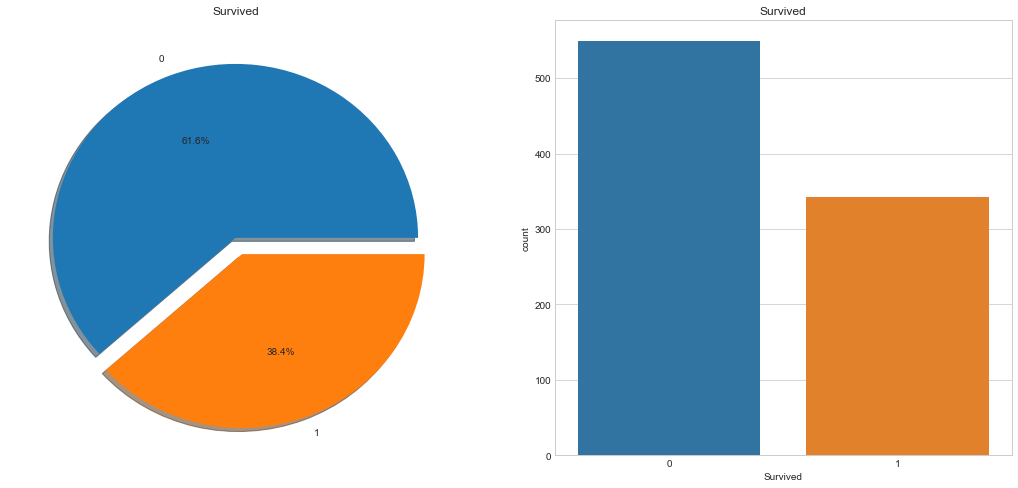

In [256]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

# Let look into  some of these features 

Feature: Embarked

In [257]:
# How many missing values does Embarked have?
missing_values['Embarked']

2

In [258]:
# What kind of values are in Embarked?
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

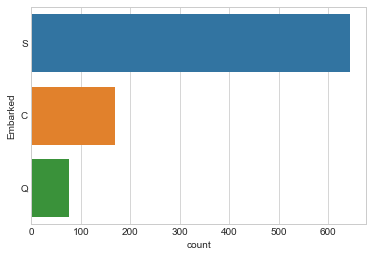

In [259]:
# What do the counts look like?
sns.countplot(y='Embarked', data=train);

I will delete the  two missing record  from Embarke

In [260]:
train= train.dropna(subset=['Embarked'])

# Feature :Sex

In [261]:
train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           231
male    0           468
        1           109
Name: Survived, dtype: int64

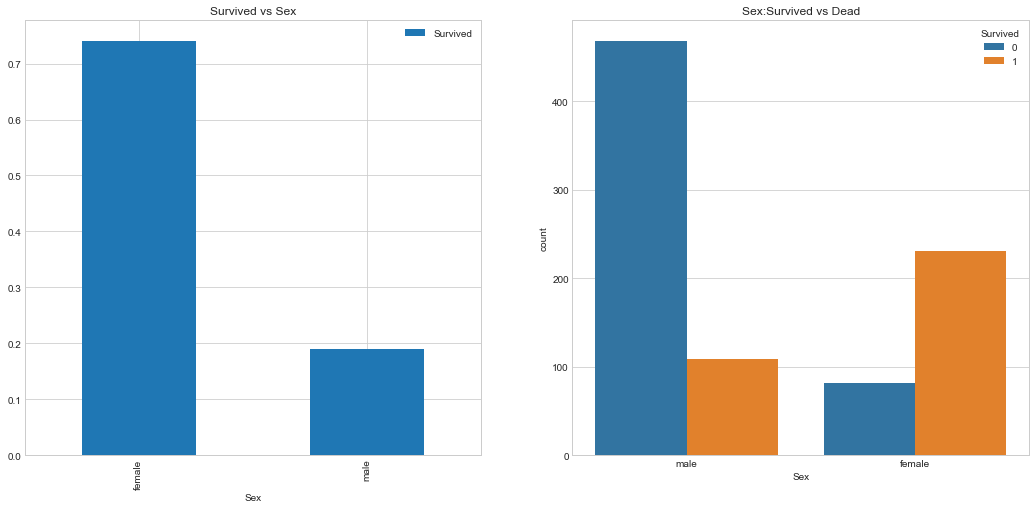

In [262]:
# Let's view the distribution of Sex
f,ax=plt.subplots(1,2,figsize=(18,8))

train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [263]:
#Let change 0 for male and 1 for female
train['Sex'] = train['Sex']

In [264]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


# Feature: Fare

In [265]:
# What kind of variable is Fare?
train.Fare.dtype

dtype('float64')

In [266]:
print('Highest Fare was:',train['Fare'].max())
print('Lowest Fare was:',train['Fare'].min())
print('Average Fare was:',train['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.09668087739029


In [267]:
# How many unique kinds of Fare are there?
print("There are {} unique Fare values.".format(len(train.Fare.unique())))

There are 247 unique Fare values.


In [268]:

train['Fare'] = train['Fare']

In [269]:
# What do our Fare bins look like?
train.Fare.value_counts().head()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
Name: Fare, dtype: int64

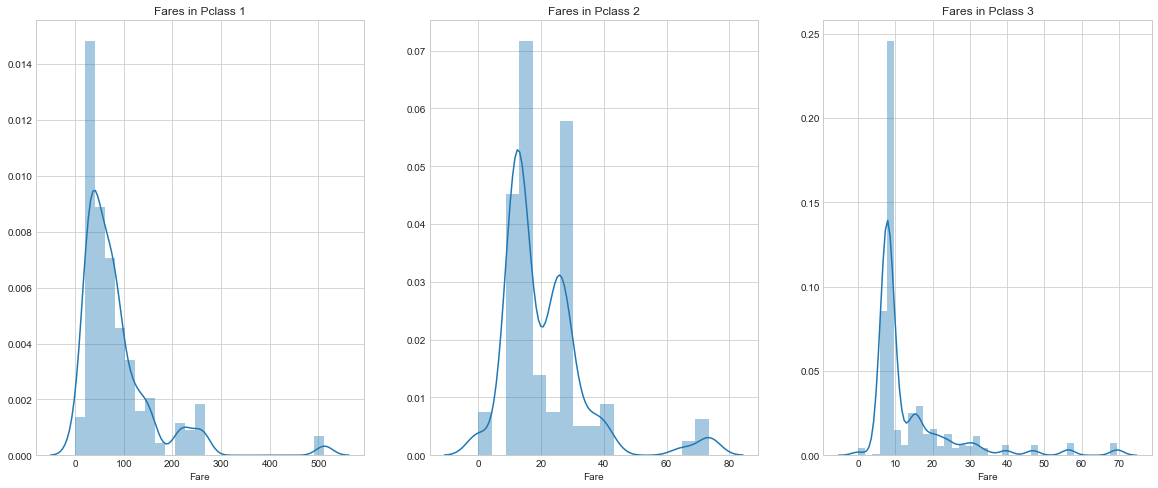

In [270]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(train[train['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train[train['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train[train['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

There looks to be a large distribution in the fares of Passengers in Pclass1 and this distribution goes on decreasing as the standards reduces. As this is also continous, we can convert into discrete values by using binning.

In [271]:
display(test.head(), train.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


# Feature encoding(Label encoding)

In [272]:
# Label Encode all continuous values using LabelEncoder()
train = train.apply(LabelEncoder().fit_transform)

train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,2,1,1,0,18,2
1,1,0,0,1,0,207,0
2,1,2,0,0,0,41,2
3,1,0,0,1,0,189,2
4,0,2,1,0,0,43,2


# Correlation Between The Features

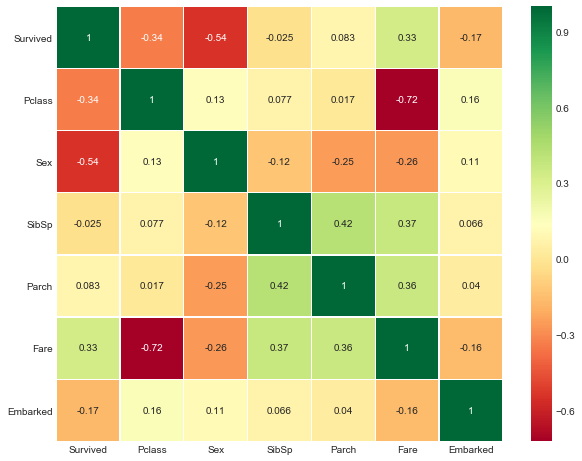

In [273]:
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# Predictive Modeling

In [274]:
# Split the dataframe into data and labels
x_train = train.drop('Survived', axis=1) # data
y_train = train.Survived # labels


#target = train["Survived"]
#x_train, x_val, y_train, y_val = train_test_split(train, target, test_size = 0.22, random_state = 0)

# Gaussian Naive Bayes

In [275]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.cross_validation  import cross_val_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_train)


cr_gaussian = classification_report(y_train,y_pred)
acc_gaussian = round(accuracy_score(y_pred, y_train) * 100, 2)
acc_cv_gaussian =round(cross_val_score(gaussian, x_train,y_train, cv=10, scoring='accuracy').mean() * 100,2)

print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print(cr_gaussian)



Accuracy: 76.72
Accuracy CV 10-Fold: 76.38
             precision    recall  f1-score   support

          0       0.84      0.77      0.80       549
          1       0.67      0.77      0.72       340

avg / total       0.78      0.77      0.77       889



# Logistic Regression

In [276]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_train)

cr_logreg = classification_report(y_train,y_pred)
acc_logreg = round(accuracy_score(y_pred, y_train) * 100, 2)


acc_cv_logreg =round(cross_val_score(logreg, x_train,y_train, cv=10, scoring='accuracy').mean() * 100,2)

print("Accuracy: %s" % acc_logreg)
print("Accuracy CV 10-Fold: %s" % acc_cv_logreg)
print(cr_logreg)


Accuracy: 79.08
Accuracy CV 10-Fold: 78.52
             precision    recall  f1-score   support

          0       0.82      0.85      0.83       549
          1       0.74      0.69      0.72       340

avg / total       0.79      0.79      0.79       889



In [277]:
# Support Vector Machines

In [278]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_train)



cr_svc = classification_report(y_train,y_pred)
acc_svc = round(accuracy_score(y_pred, y_train) * 100, 2)


acc_cv_svc =round(cross_val_score(svc, x_train,y_train, cv=10, scoring='accuracy').mean() * 100,2)

print("Accuracy: %s" % acc_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_svc)
print(cr_svc)


Accuracy: 84.93
Accuracy CV 10-Fold: 76.04
             precision    recall  f1-score   support

          0       0.86      0.90      0.88       549
          1       0.82      0.77      0.80       340

avg / total       0.85      0.85      0.85       889



In [279]:
# Linear SVC

In [280]:

from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_train)

cr_linear_svc = classification_report(y_train,y_pred)
acc_linear_svc = round(accuracy_score(y_pred, y_train) * 100, 2)

acc_cv_linear_svc =round(cross_val_score(linear_svc, x_train,y_train, cv=10, scoring='accuracy').mean() * 100,2)

print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print(cr_linear_svc)


Accuracy: 77.39
Accuracy CV 10-Fold: 72.78
             precision    recall  f1-score   support

          0       0.82      0.81      0.81       549
          1       0.70      0.72      0.71       340

avg / total       0.78      0.77      0.77       889



In [281]:
#Decision Tree

In [282]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_train)

cr_decisiontree = classification_report(y_train,y_pred)
acc_decisiontree = round(accuracy_score(y_pred, y_train) * 100, 2)


acc_cv_decisiontree =round(cross_val_score(decisiontree, x_train,y_train, cv=10, scoring='accuracy').mean() * 100,2)

print("Accuracy: %s" % acc_decisiontree)
print("Accuracy CV 10-Fold: %s" % acc_cv_decisiontree)
print(cr_decisiontree)


Accuracy: 92.46
Accuracy CV 10-Fold: 79.53
             precision    recall  f1-score   support

          0       0.91      0.97      0.94       549
          1       0.95      0.84      0.90       340

avg / total       0.93      0.92      0.92       889



In [283]:
# Random Forest

In [284]:

from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_train)

cr_randomforest = classification_report(y_train,y_pred)
acc_randomforest = round(accuracy_score(y_pred, y_train) * 100, 2)

acc_cv_randomforest =round(cross_val_score(randomforest, x_train,y_train, cv=10, scoring='accuracy').mean() * 100,2)

print("Accuracy: %s" % acc_randomforest)
print("Accuracy CV 10-Fold: %s" % acc_cv_randomforest)
print(cr_randomforest)

Accuracy: 91.68
Accuracy CV 10-Fold: 79.64
             precision    recall  f1-score   support

          0       0.91      0.96      0.93       549
          1       0.93      0.84      0.89       340

avg / total       0.92      0.92      0.92       889



In [285]:
# KNN or k-Nearest Neighbors

In [286]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_train)

cr_knn = classification_report(y_train,y_pred)
acc_knn = round(accuracy_score(y_pred, y_train) * 100, 2)


acc_cv_knn =round(cross_val_score(knn, x_train,y_train, cv=10, scoring='accuracy').mean() * 100,2)

print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print(cr_knn)


Accuracy: 81.44
Accuracy CV 10-Fold: 73.68
             precision    recall  f1-score   support

          0       0.84      0.86      0.85       549
          1       0.77      0.74      0.75       340

avg / total       0.81      0.81      0.81       889



In [287]:
# Stochastic Gradient Descent

In [288]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_train)

cr_sgd = classification_report(y_train,y_pred)
acc_sgd = round(accuracy_score(y_pred, y_train) * 100, 2)


acc_cv_sgd =round(cross_val_score(sgd, x_train,y_train, cv=10, scoring='accuracy').mean() * 100,2)

print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print(cr_sgd)

Accuracy: 71.32
Accuracy CV 10-Fold: 60.97
             precision    recall  f1-score   support

          0       0.75      0.80      0.78       549
          1       0.64      0.57      0.60       340

avg / total       0.71      0.71      0.71       889



In [289]:
# Gradient Boosting Classifier

In [290]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_train)

cr_gbk = classification_report(y_train,y_pred)
acc_gbk = round(accuracy_score(y_pred, y_train) * 100, 2)


acc_cv_gbk =round(cross_val_score(gbk, x_train,y_train, cv=10, scoring='accuracy').mean() * 100,2)

print("Accuracy: %s" % acc_gbk)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbk)
print(cr_gbk)


Accuracy: 86.39
Accuracy CV 10-Fold: 81.1
             precision    recall  f1-score   support

          0       0.85      0.94      0.90       549
          1       0.89      0.74      0.81       340

avg / total       0.87      0.86      0.86       889



# Let's compare the accuracies of each model!


In [291]:


models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
6,Decision Tree,92.46
3,Random Forest,91.68
8,Gradient Boosting Classifier,86.39
0,Support Vector Machines,84.93
1,KNN,81.44
2,Logistic Regression,79.08
5,Linear SVC,77.39
4,Naive Bayes,76.72
7,Stochastic Gradient Descent,71.32


In [292]:

cv_models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_cv_svc, acc_cv_knn, acc_cv_logreg, 
              acc_cv_randomforest, acc_cv_gaussian,acc_cv_linear_svc, acc_cv_decisiontree,
              acc_cv_sgd, acc_cv_gbk]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
8,Gradient Boosting Classifier,81.10
3,Random Forest,79.64
6,Decision Tree,79.53
2,Logistic Regression,78.52
4,Naive Bayes,76.38
0,Support Vector Machines,76.04
1,KNN,73.68
5,Linear SVC,72.78
7,Stochastic Gradient Descent,60.97


We can see from the tables, the Gradient Boosting Classifier had the best results with 81% , It is the best to pay more attention to the cross-validation figure.
Cross-validation is more robust than just the .fit() models as it does multiple passes over the data instead of one.
Because the CatBoost model got the best resultsThere fore the best model to be considered is Gradient Boosting Classifier

In [293]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png') 

,imp,col
5,0.031111,Embarked
0,0.045669,Pclass
2,0.047171,SibSp
3,0.085073,Parch
1,0.163012,Sex
4,0.627963,Fare


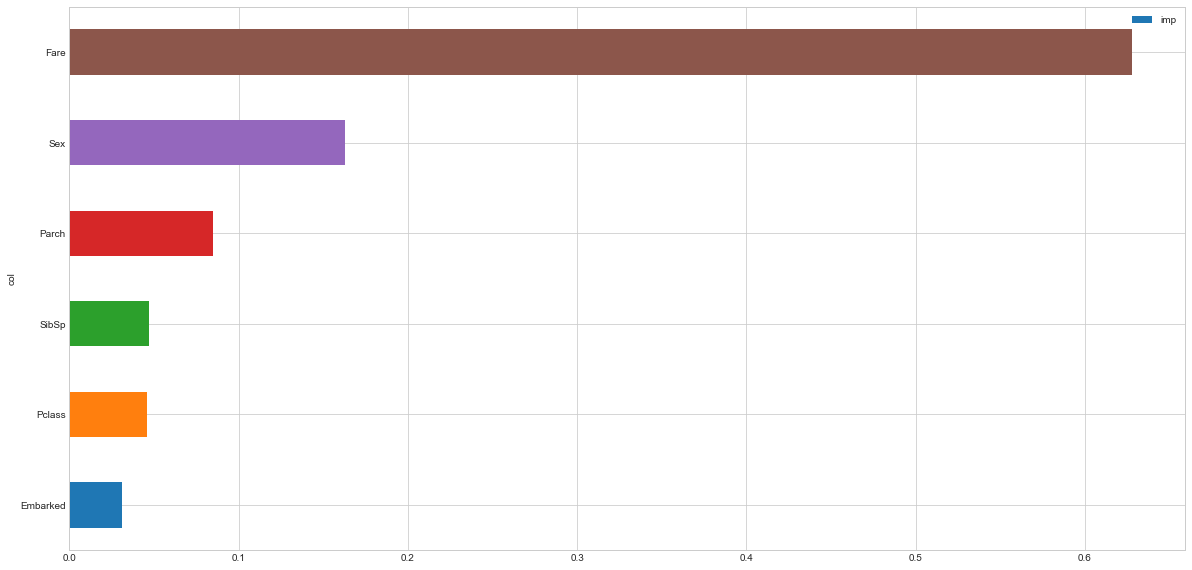

In [294]:
# Plot the feature importance scores
feature_importance(gbk, X_train)

In [300]:
test1 =test.drop(['PassengerId','Name','Age','Ticket','Cabin'], axis=1)
test1.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,male,0,0,7.8292,Q
1,3,female,1,0,7.0000,S
2,2,male,0,0,9.6875,Q
3,3,male,0,0,8.6625,S
4,3,female,1,1,12.2875,S


In [301]:
# Make a prediction using the CatBoost model on the wanted columns
predictions = gbk.predict(test1.apply(LabelEncoder().fit_transform))

In [302]:
# Our predictions array is comprised of 0's and 1's (Survived or Did Not Survive)
predictions[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [305]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset

# Let's convert our submission dataframe 'Survived' column to ints
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')
submission.head(20)


Converted Survived column to integers.


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,0
9,901,0


In [ ]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('C:/Users/sfagb/Desktop/kaggle/Titanic/submission.csv', index=False)
print('Submission CSV is ready!')